# Customer Segmentation Project


### figuring out who the best customers are. I will look at the data in the following ways to answer that question:
####  Male vs. Female customers.
#### 1.  which gender has a higher income.
#### 2.  which gender has a higher average spending score.

## Preparation

In [4]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
customers = pd.read_csv('Mall_Customers.csv')

In [6]:
customers.shape

(200, 5)

In [7]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
customers.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## EDA

In [9]:
# descriptive statistics
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# count is full for all column so no cleaning 

#### Age looks normally distributed, 
#### annual income in the thousands doesn't have outliers that are too excessive.
#### Spending score is in fact between 1 and 100. Everything looks good.

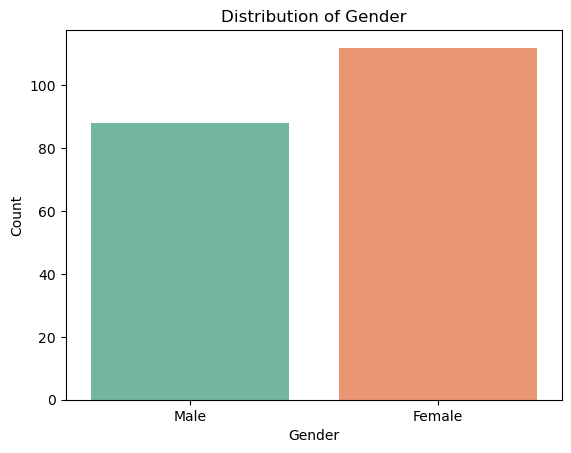

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Gender
sns.countplot(x='Gender', data=customers, palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


There are more women than men in this dataset.

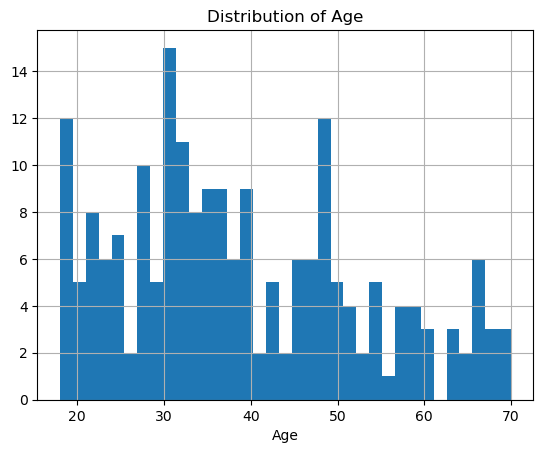

In [11]:
# Histogram for ages
customers.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

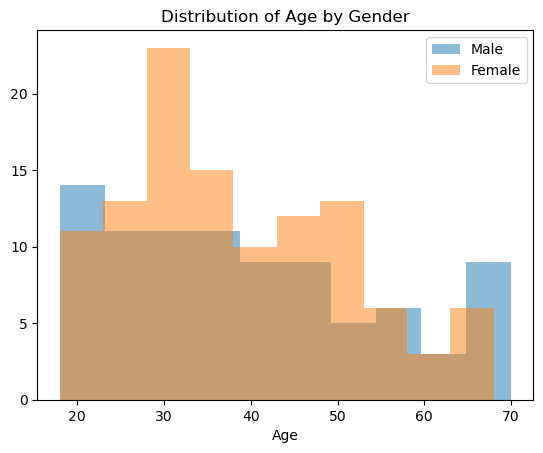

In [12]:
# Histogram of ages by gender
plt.hist('Age', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

### We can see two things here, one reflected earlier in the describe call:

#### 1. There are more women than men in this data set.

#### 2. There are a lot of younger women and middle-aged women.

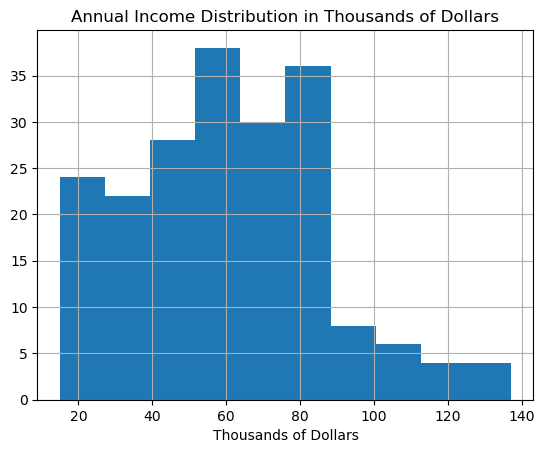

In [13]:
# Histogram of income
customers.hist('Annual Income (k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

#### The most frequent annual incomes are between around 50 and 85,000.

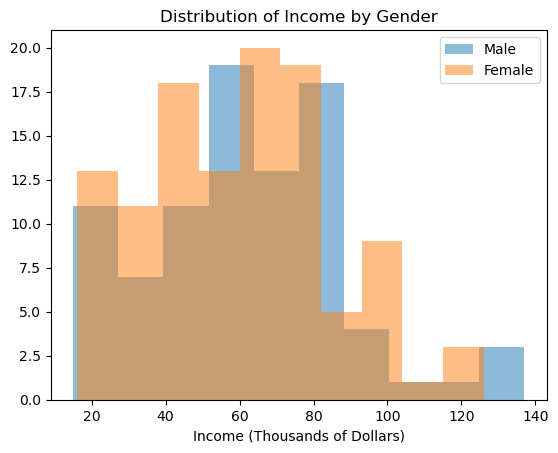

In [14]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

#### Women have lower income than men, the majority falling between 45 and 80,000.

In [15]:
# Create data sets by gender
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

In [16]:
# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


#### Women on average had a higher spending score by about 3 points.

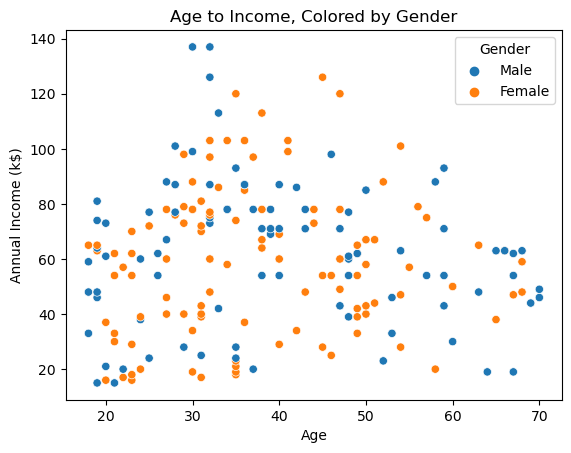

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'customers' is a DataFrame
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=customers)
plt.title('Age to Income, Colored by Gender')
plt.show()

#### There is pretty much no correlation between age and income for either men or women in this data. The correlation matrix below confirms this.

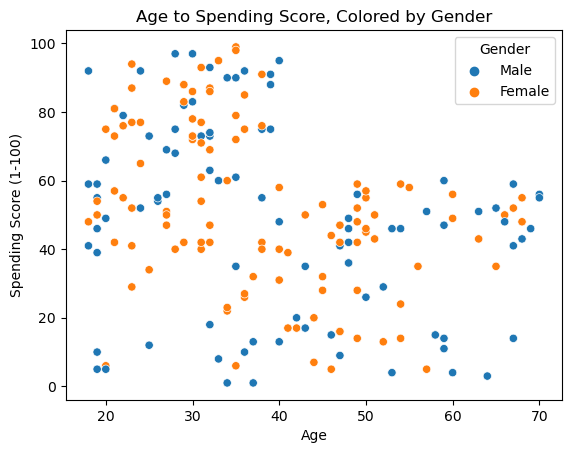

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'customers' is a valid DataFrame
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=customers)
plt.title('Age to Spending Score, Colored by Gender')
plt.show()

#### The above plot shows the negative correlation between age and spending score. It's not a strong association, but the older the person, the worse their spending score.

C:\Users\Ajay Prakash\AppData\Local\Temp\ipykernel_17048\311221467.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(female_customers.corr(), annot=True);


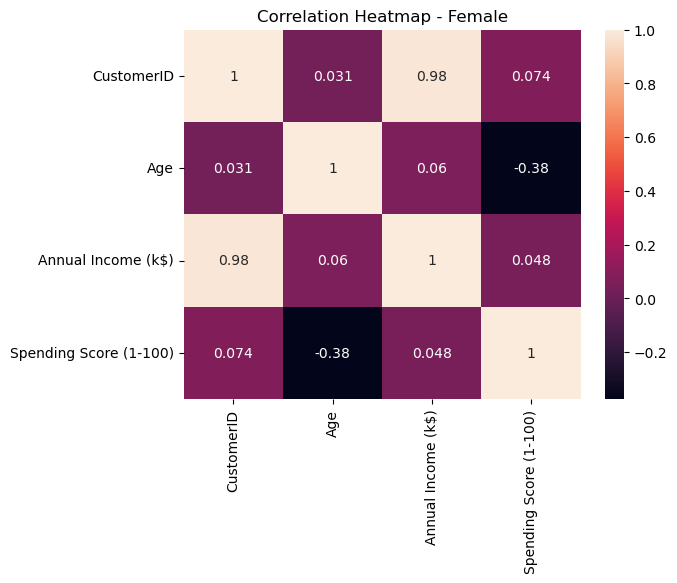

In [19]:
sns.heatmap(female_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Female');

C:\Users\Ajay Prakash\AppData\Local\Temp\ipykernel_17048\4229580870.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(male_customers.corr(), annot=True);


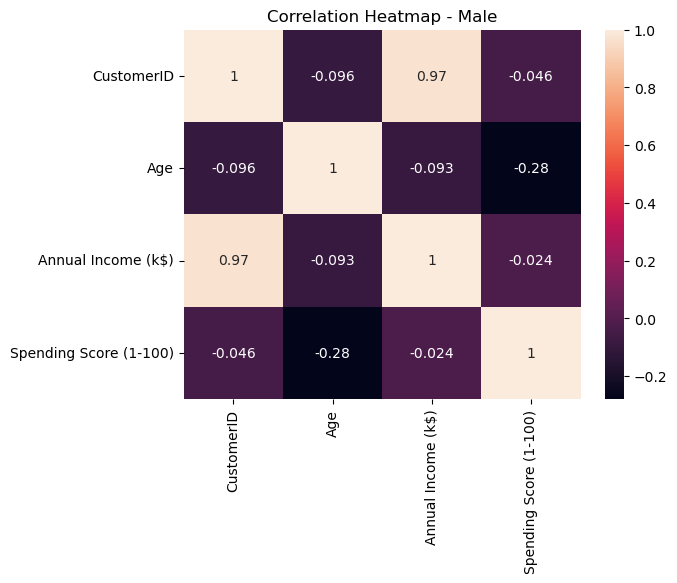

In [20]:
sns.heatmap(male_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Male');

#### Comparing men to women reveals that there is a slightly higher correlation between age and spending score for women.

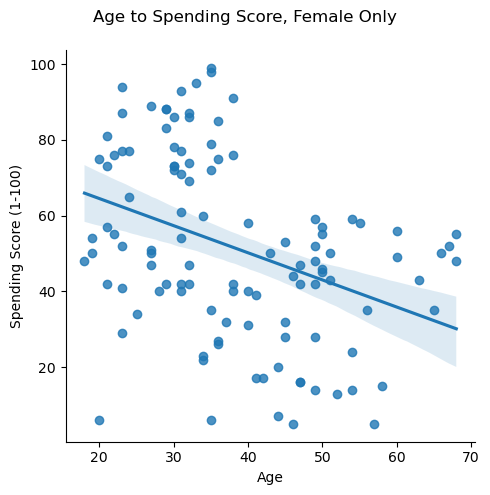

In [21]:
sns.lmplot(x='Age', y='Spending Score (1-100)', data=female_customers)
plt.subplots_adjust(top=0.9)  # Adjust subplot to fit the title
plt.suptitle('Age to Spending Score, Female Only')  # Set title for lmplot
plt.show()

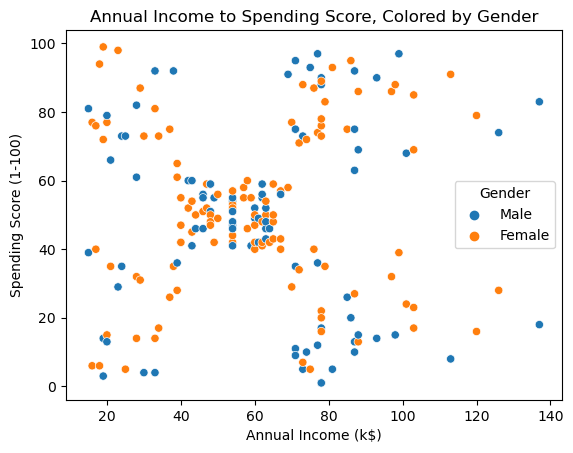

In [22]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=customers)
plt.title('Annual Income to Spending Score, Colored by Gender')
plt.show()

In [23]:
x = customers[['Annual Income (k$)','Spending Score (1-100)']]

In [24]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [25]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")



In [26]:
%pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [27]:
knn = KMeans(n_clusters=5)
knn.fit(x)

KMeans(n_clusters=5)

In [28]:
knn.predict(x)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [29]:
y = knn.predict(x)
x['clusters'] = y
x.head()

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

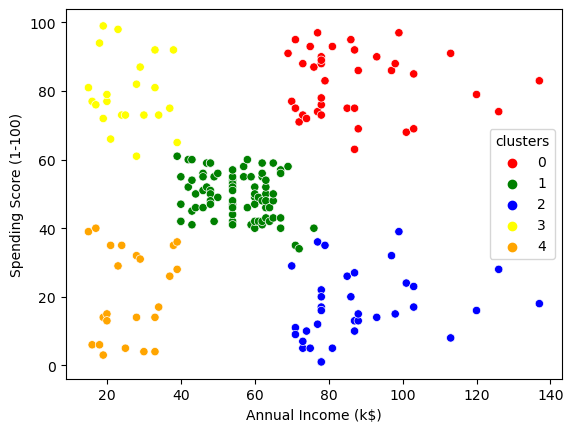

In [30]:
    import seaborn as sns
    palette = ['red', 'green', 'blue', 'yellow', 'orange']
    sns.scatterplot(data=x, x='Annual Income (k$)', y='Spending Score (1-100)', hue='clusters', palette=palette)